# Exploring full dataset with Pandas

1. Read all meeting record files into a list

In [106]:
import glob

# read all files in directory into a list, where 1 file = 1 list element
list_of_meetings = []
for filename in glob.glob('corpus/meeting_records_clean_final/*.txt'):
     with open(filename, 'r') as f:
         list_of_meetings.append(f.read())
         f.close()

Check to make sure we got them all:

In [107]:
len(list_of_meetings) # should be 1236

1236

In [108]:
import pandas as pd
meetingseries = pd.Series(list_of_meetings)

# create DF from Series
meetingframe = meetingseries.to_frame('meeting_text') # create new df, name column "meeting_text"

# set index for dataframe merge
meetingframe['id'] = meetingframe.index

# read in working CSV file
# working dir: UN/
recs = pd.read_table('clean_records_copy.csv', sep=',')

# set index for df merge
recs['id'] = recs.index

# Merge on 'id'
full_data = pd.merge(recs, meetingframe)
         
# drop 'id' column
full_data.drop('id', axis=1, inplace=True)

Look at new dataframe:

In [109]:
full_data.head()

,record,day,press_release,topic,year,category,outcome,region,record_number,meeting_text
0,S/PV.3326,6-Jan,SC/5770,Rwanda,1994,0,S/RES/893 (1994),4,3326,ÔªøUNITED\r\nNATIONS\r\nS\r\nSecurity Council\...
1,S/PV.3329,14-Jan,SC/5775,South Africa,1994,0,S/RES/894 (1994),4,3329,ÔªøUNITED\r\nNATIONS\r\nS\r\nSecurity Council\...
2,S/PV.3331,28-Jan,SC/5779,Middle East UNIFIL,1994,0,S/RES/895 (1994),3,3331,UNITED\nSNATIONS\nSecurity Council\nPROVISIONA...
3,S/PV.3332,31-Jan,SC/5780,Georgia,1994,0,S/RES/896 (1994),5,3332,UNITED\nSNATIONS\nSecurity Council\nPROVISIONA...
4,S/PV.3334,4-Feb,SC/5782,Somalia,1994,1,S/RES/897 (1994),4,3334,UNITEDUNITED\nSNATIONSNATIONS\nSecurity Counci...


Look at overall mean value for "category" column to see what the intervention/soft action ratio is:

In [110]:
full_data.category.mean()

0.40938511326860844

**Conclusion**: On average, since 1994, the UN has been more likely to propose soft action than intervention.

##Regional distribution by action type

Using split-apply-combine methods, we can analyze action type by region.

### Region codes used:
* 0 - General / Multi-Region (includes sanctions packages)
* 1 - Central & Northeast Asia
* 2 - Southeast Asia
* 3 - Middle East / North Africa
* 4 - Sub-Saharan Africa
* 5 - Europe / Balkans
* 6 - Central America / Caribbean (includes Haiti)

In [111]:
# First, map region codes to region names for easier interpretation
full_data['region'] = full_data['region'].map({0: 'general', 1: 'Central / NE Asia', 2: 'Southeast Asia', 3: 'Middle East / North Africa', 4: 'Sub-Saharan Africa', 5: 'Europe / Balkans', 6: 'Central America / Caribbean'})

# Use groupby to look at means:
full_data.groupby('region').category.mean()

region
Central / NE Asia              0.309859
Central America / Caribbean    0.500000
Europe / Balkans               0.317536
Middle East / North Africa     0.256098
Southeast Asia                 0.115385
Sub-Saharan Africa             0.569030
general                        0.245283
Name: category, dtype: float64

* More interventions than soft action initiatives in: Sub-Saharan Africa (mean = 0.569)
* Equal amounts of interventions and soft actions: Central America / Caribbean (mean = 0.5)
* Lowest intervention/soft action ratio: Southeast Asia (mean = 0.11)

### Intervention/soft action ratio by region

In [112]:
full_data.groupby('region').category.agg(['count', 'mean']).sort('mean', ascending = False)

,count,mean
region,,
Sub-Saharan Africa,536,0.569030
Central America / Caribbean,40,0.500000
Europe / Balkans,211,0.317536
Central / NE Asia,71,0.309859
Middle East / North Africa,246,0.256098
general,106,0.245283
Southeast Asia,26,0.115385


### Resolution count by region, with corresponding intervention/soft action ratio

In [113]:
full_data.groupby('region').category.agg(['count', 'mean']).sort('count', ascending = False)

,count,mean
region,,
Sub-Saharan Africa,536,0.569030
Middle East / North Africa,246,0.256098
Europe / Balkans,211,0.317536
general,106,0.245283
Central / NE Asia,71,0.309859
Central America / Caribbean,40,0.500000
Southeast Asia,26,0.115385


### Resolution count by topic, with intervention/soft action ratio 

In [114]:
group1 = full_data.groupby('topic').category.agg(['count', 'mean']).sort('count', ascending = False)

In [115]:
group1.head(30) # display only top 30, "frequent flyers"

,count,mean
topic,,
Democratic Republic of the Congo,62,0.790323
Western Sahara,56,0.000000
Liberia,51,0.705882
Somalia,47,0.893617
Cote d'Ivoire,47,0.936170
Angola,46,0.347826
Iraq-Kuwait,44,0.931818
Cyprus,42,0.000000
Sierra Leone,39,0.384615


In [116]:
group3 = group1.head(30) # assign top 30 to new dataframe

In [117]:
group3.sort('mean', ascending = False) # sort new top-30 "frequent flyers" dataframe by mean

,count,mean
topic,,
Cote d'Ivoire,47,0.936170
Iraq-Kuwait,44,0.931818
Somalia,47,0.893617
Democratic Republic of the Congo,62,0.790323
Liberia,51,0.705882
Bosnia and Herzegovina,39,0.641026
Haiti,35,0.571429
Sudan,34,0.558824
Central African Republic,12,0.500000


### Resolutions by topic, sorted by intervention/soft action ratio

In [118]:
group2 = full_data.groupby('topic').category.agg(['count', 'mean']).sort('mean', ascending = False)

In [119]:
group2.head(30) # display only top 30

,count,mean
topic,,
Security Council mission Democratic Republic of the Congo,1,1.000000
The situation between Iraq and Kuwait,1,1.000000
Federal Republic of Yugoslavia termination of sanctions,1,1.000000
Mali,1,1.000000
Report of the Secretary-General on the situation in Abyei,2,1.000000
Report of the Secretary-General on the Sudan and South Sudan,3,1.000000
Report of the Secretary-General in Sudan - South Sudan,1,1.000000
Peace and security in Africa Libya,1,1.000000
Peace and security in Africa,1,1.000000


### Crosstabs:

In [120]:
pd.crosstab(full_data.region, full_data.category)

category,0,1
region,,
Central / NE Asia,49,22
Central America / Caribbean,20,20
Europe / Balkans,144,67
Middle East / North Africa,183,63
Southeast Asia,23,3
Sub-Saharan Africa,231,305
general,80,26


In [121]:
full_data.head() # take a look at the original dataframe to see what we need to drop for ease of further exploration

,record,day,press_release,topic,year,category,outcome,region,record_number,meeting_text
0,S/PV.3326,6-Jan,SC/5770,Rwanda,1994,0,S/RES/893 (1994),Sub-Saharan Africa,3326,ÔªøUNITED\r\nNATIONS\r\nS\r\nSecurity Council\...
1,S/PV.3329,14-Jan,SC/5775,South Africa,1994,0,S/RES/894 (1994),Sub-Saharan Africa,3329,ÔªøUNITED\r\nNATIONS\r\nS\r\nSecurity Council\...
2,S/PV.3331,28-Jan,SC/5779,Middle East UNIFIL,1994,0,S/RES/895 (1994),Middle East / North Africa,3331,UNITED\nSNATIONS\nSecurity Council\nPROVISIONA...
3,S/PV.3332,31-Jan,SC/5780,Georgia,1994,0,S/RES/896 (1994),Europe / Balkans,3332,UNITED\nSNATIONS\nSecurity Council\nPROVISIONA...
4,S/PV.3334,4-Feb,SC/5782,Somalia,1994,1,S/RES/897 (1994),Sub-Saharan Africa,3334,UNITEDUNITED\nSNATIONSNATIONS\nSecurity Counci...


### Drop all text columns

In [122]:
full_data.drop(['record', 'day', 'press_release', 'topic', 'outcome', 'record_number', 'meeting_text'], axis=1, inplace = True)   

### Visualizations

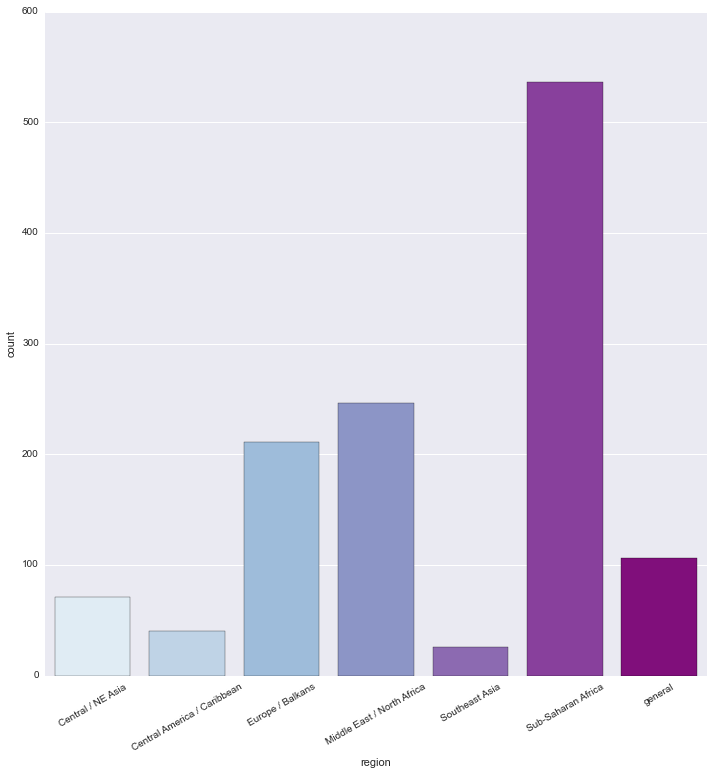

In [123]:
%matplotlib inline
import seaborn as sns
d = sns.factorplot("region", data=full_data, palette="BuPu", size=10) # resolution counts by region
d.set_xticklabels(rotation=30) # make x-axis tick labels readable

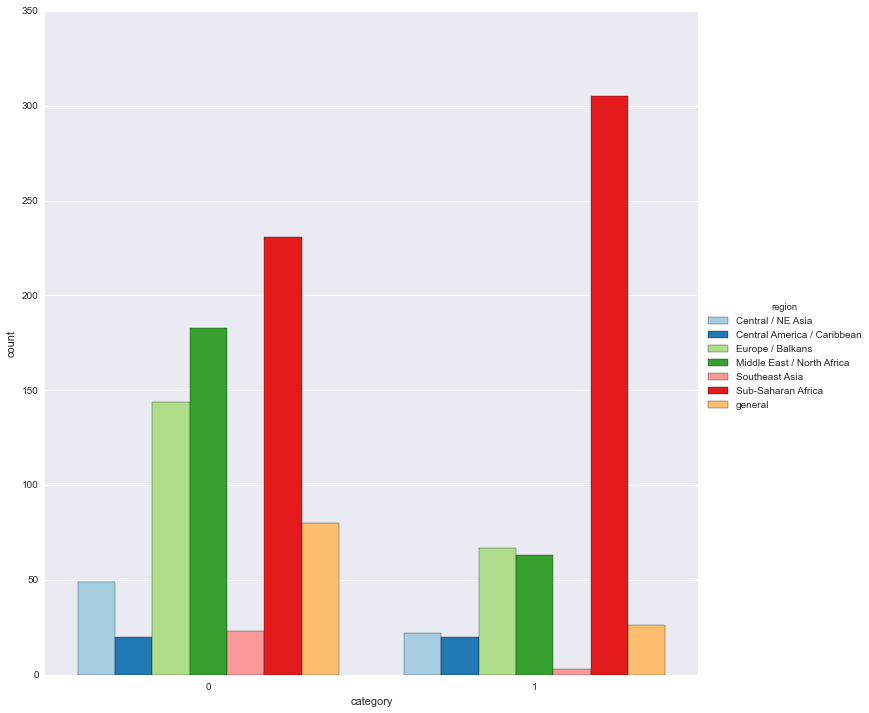

In [124]:
%matplotlib inline
import seaborn as sns
sns.factorplot("category", hue="region", data=full_data, palette="Paired", size=10) # group by category


### Time series plotting with seaborn

First, explore the data:

In [126]:
full_data.groupby('year').mean()

,category
year,
1994,0.301370
1995,0.316667
1996,0.150943
1997,0.230769
1998,0.314286
1999,0.233333
2000,0.312500
2001,0.360000
2002,0.454545


Next, sort by mean:

In [131]:
ts_group = full_data.groupby('year').mean() # assign to new dataframe object

In [133]:
ts_group.head() # check that it worked

,category
year,
1994,0.301370
1995,0.316667
1996,0.150943
1997,0.230769
1998,0.314286


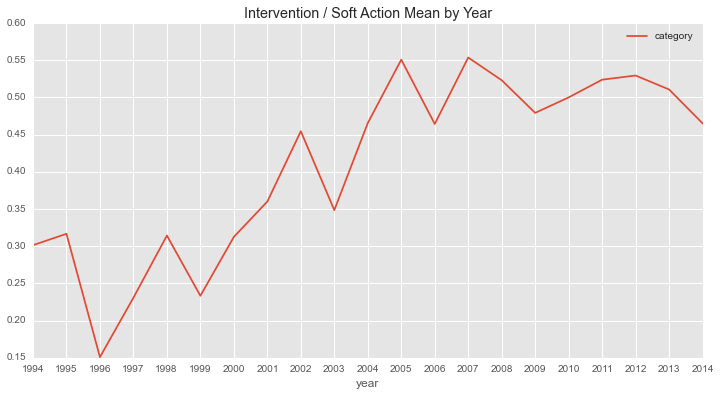

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot') # make it slightly prettier
ts_group.plot(figsize=(12,6), title = "Intervention / Soft Action Mean by Year") # make figsize bigger, set title
plt.locator_params(nbins=20) # show every year
# use this later: plt.savefig('temp.png')